# Installation of RDKit                                                

In [1]:
!conda install -c rdkit rdkit -y 

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py37h6dcda5c_3         342 KB  conda-forge
    rdkit-2020.09.5            |   py37he53b9e1_0        26.0 MB  conda-forge
    re

# Imports

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rdkit

# Loading data

In [3]:
df = pd.read_csv("../input/bms-molecular-translation/train_labels.csv")

# Drawing molecules

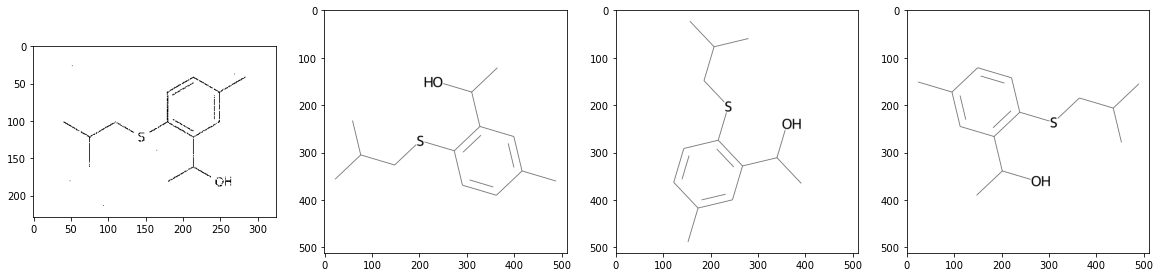

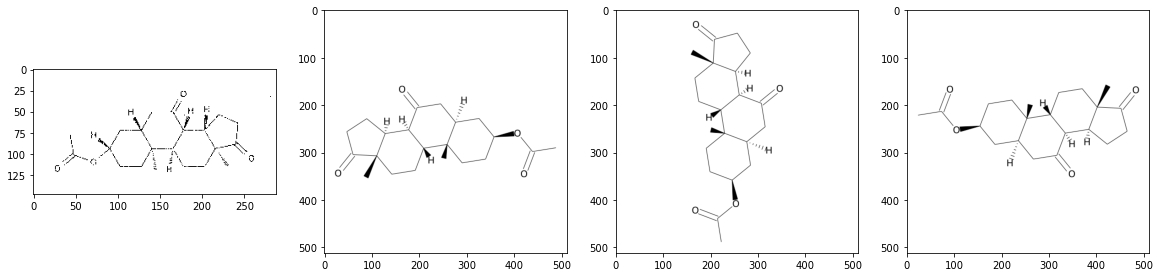

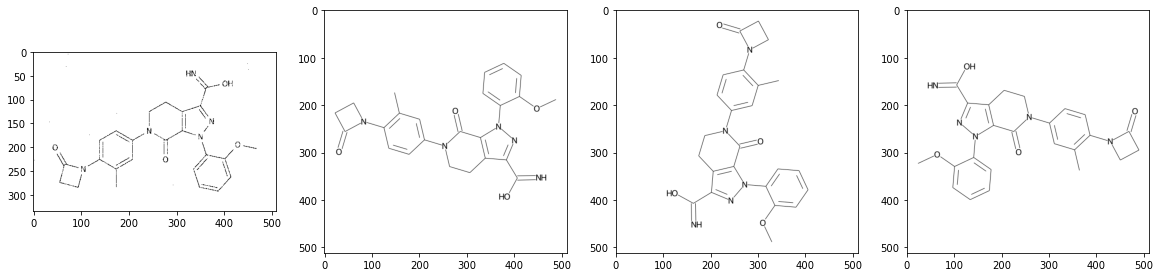

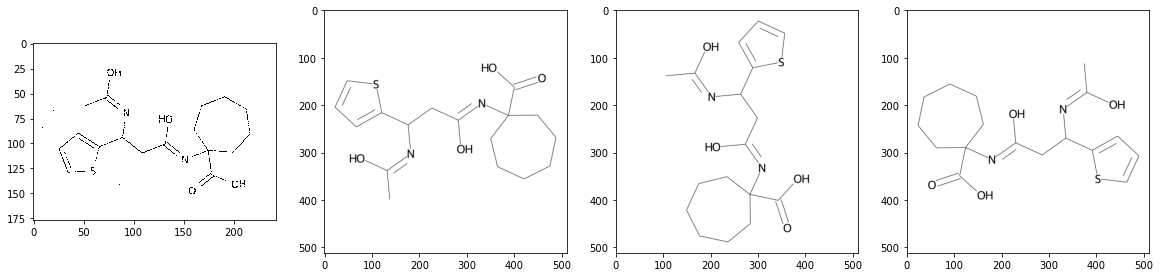

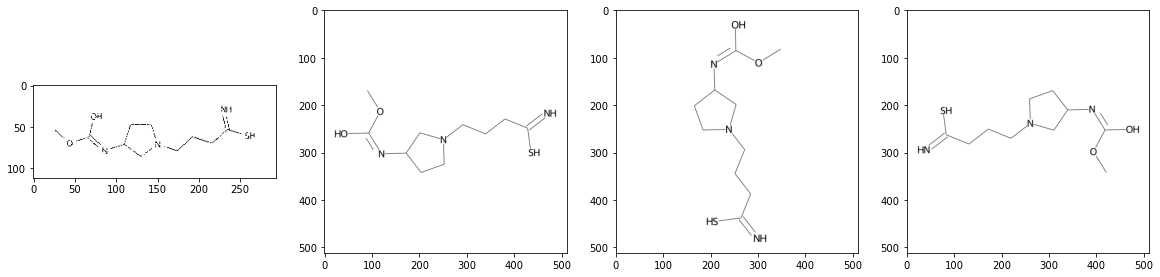

In [4]:
for _, row in df.head(5).iterrows():
    # read original image from dataset
    img_id = row["image_id"]
    img = cv2.imread("../input/bms-molecular-translation/train/{}/{}/{}/{}.png".format(img_id[0], img_id[1], img_id[2], img_id), cv2.IMREAD_GRAYSCALE)

    # read International Chemical Identifier
    mol = rdkit.Chem.inchi.MolFromInchi(row["InChI"])

    # draw molecule with 0 degree rotation
    d = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DCairo(512, 512)
    d.drawOptions().useBWAtomPalette()
    d.drawOptions().rotate = 0
    d.drawOptions().bondLineWidth = 1
    d.DrawMolecule(mol)
    d.FinishDrawing()
    d.WriteDrawingText("0.png")
    img0 = cv2.imread("0.png", cv2.IMREAD_GRAYSCALE)

    # draw molecule with 90 degree rotation
    d = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DCairo(512, 512)
    d.drawOptions().useBWAtomPalette()
    d.drawOptions().rotate = 90
    d.drawOptions().bondLineWidth = 1
    d.DrawMolecule(mol)
    d.FinishDrawing()
    d.WriteDrawingText("90.png")
    img90 = cv2.imread("90.png", cv2.IMREAD_GRAYSCALE)

    # draw molecule with 180 degree rotation
    d = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DCairo(512, 512)
    d.drawOptions().useBWAtomPalette()
    d.drawOptions().rotate = 180
    d.drawOptions().bondLineWidth = 1
    d.DrawMolecule(mol)
    d.FinishDrawing()
    d.WriteDrawingText("180.png")
    img180 = cv2.imread("180.png", cv2.IMREAD_GRAYSCALE)

    # show images
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 4, 1), plt.imshow(img, "gray")
    plt.subplot(1, 4, 2), plt.imshow(img0, "gray")
    plt.subplot(1, 4, 3), plt.imshow(img90, "gray")
    plt.subplot(1, 4, 4), plt.imshow(img180, "gray")
    plt.show()

# Drawing molecules with noise

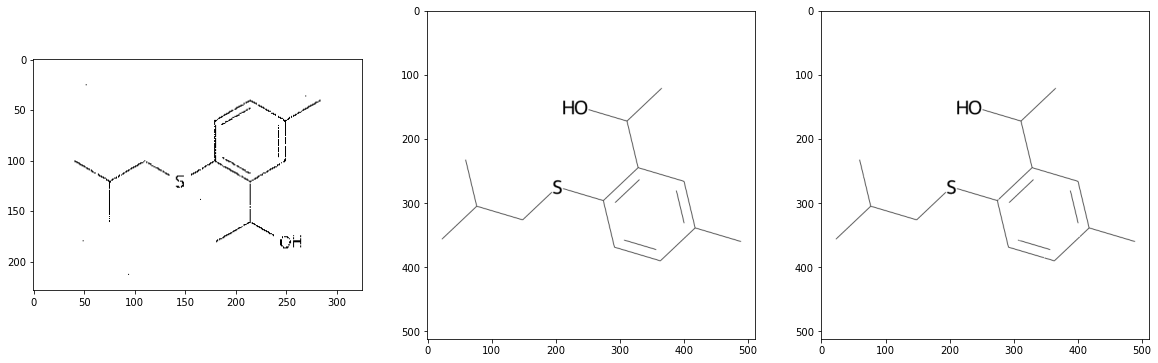

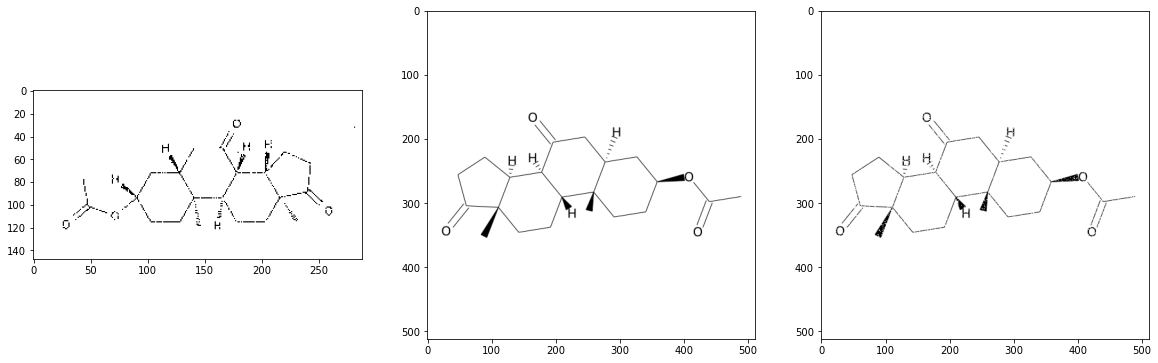

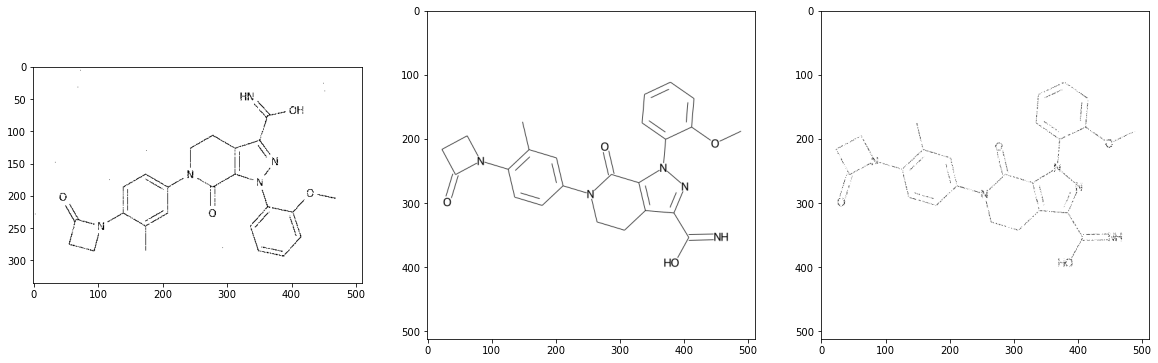

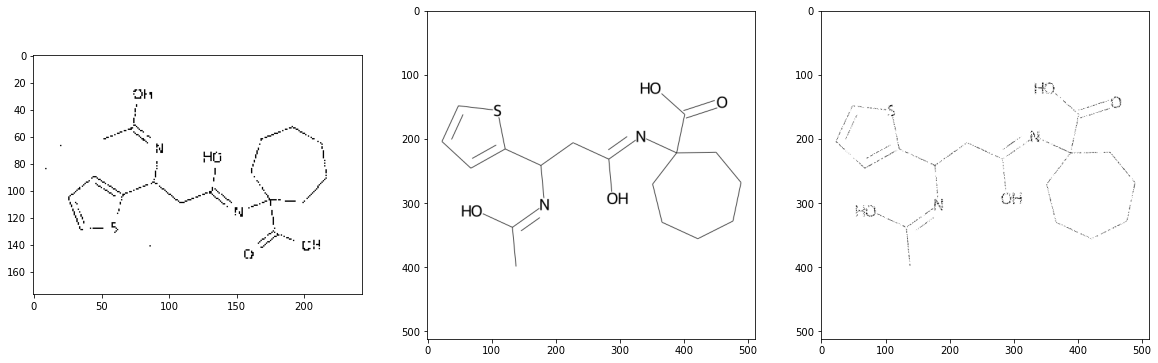

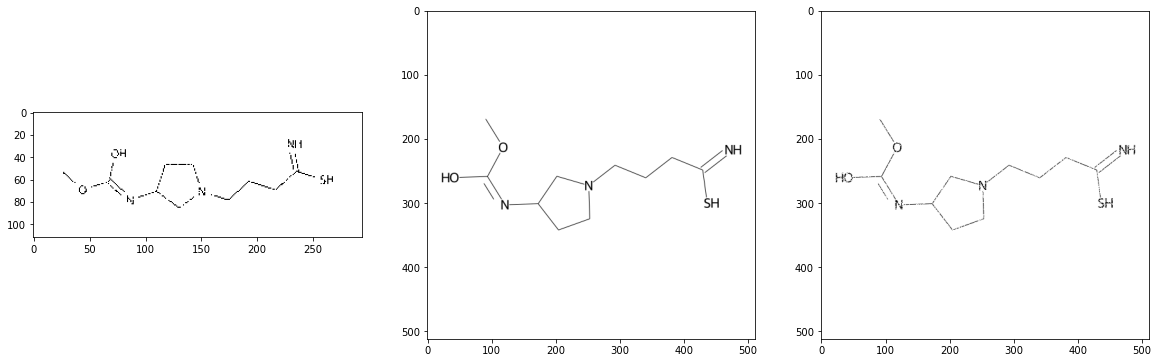

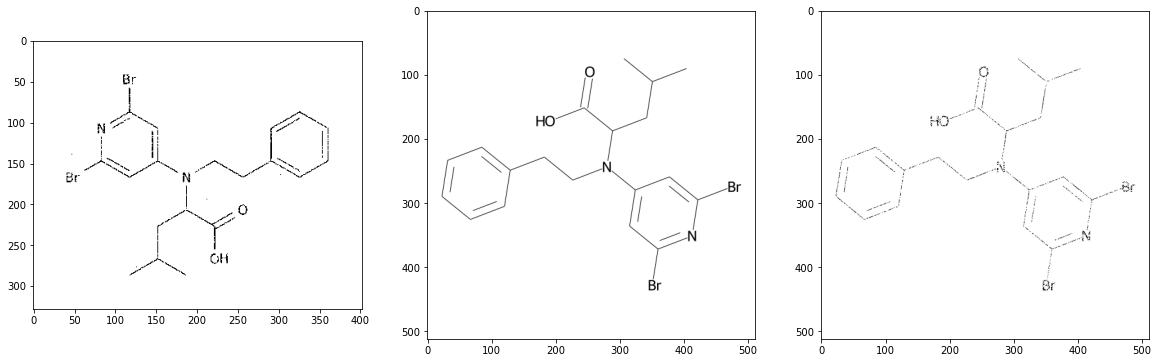

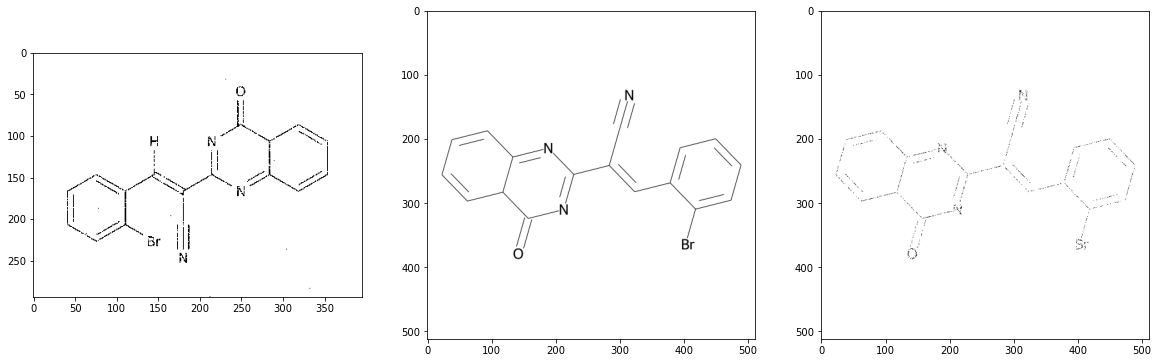

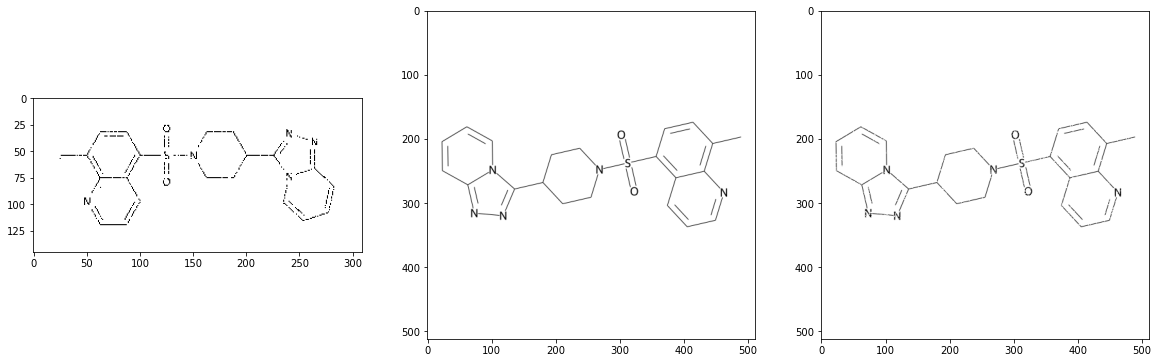

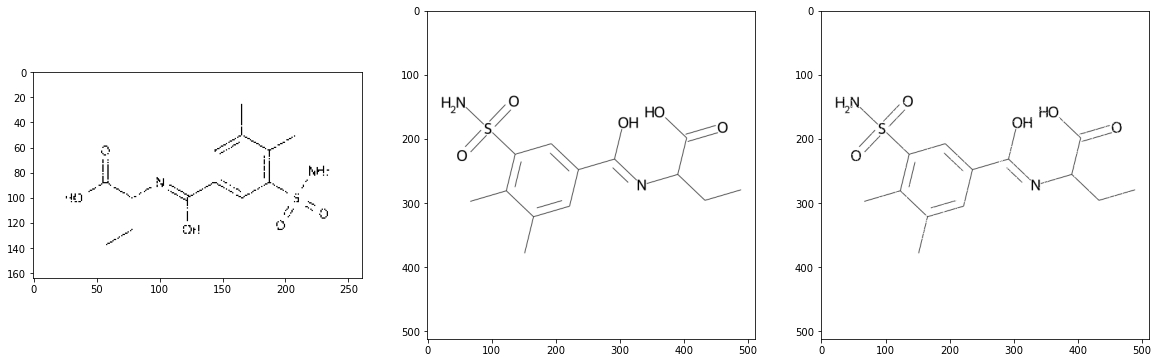

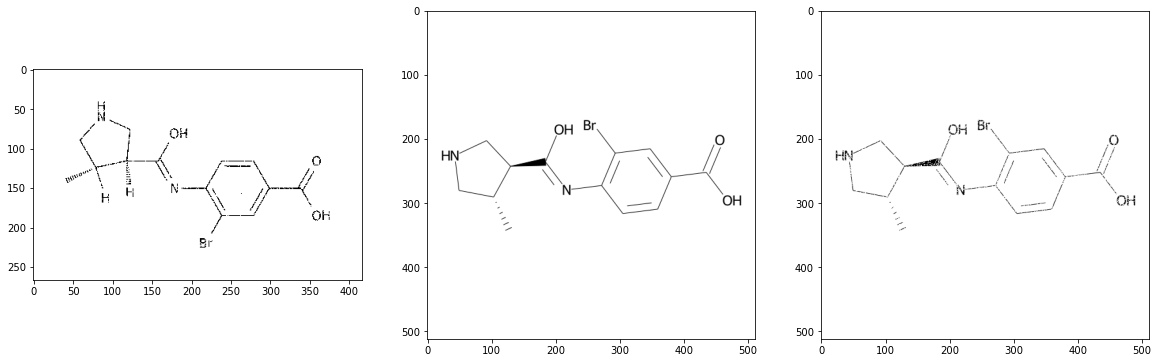

In [5]:
for _, row in df.head(10).iterrows():
    # reading original image from dataset
    img_id = row["image_id"]
    img = cv2.imread("../input/bms-molecular-translation/train/{}/{}/{}/{}.png".format(img_id[0], img_id[1], img_id[2], img_id), cv2.IMREAD_GRAYSCALE)

    # reading International Chemical Identifier
    mol = rdkit.Chem.inchi.MolFromInchi(row["InChI"])

    # drawing molecule
    d = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DCairo(512, 512)
    d.drawOptions().useBWAtomPalette()
    d.drawOptions().rotate = 0
    d.drawOptions().bondLineWidth = 1
    d.DrawMolecule(mol)
    d.FinishDrawing()
    d.WriteDrawingText("0.png")
    img0 = cv2.imread("0.png", cv2.IMREAD_GRAYSCALE)

    # molecule pixel coordinates
    y, x = np.where(img0 < 255)

    # number of random pixels to replace (higher = more noise)
    n_samples = np.random.randint(len(y))

    # choose random pixel indices
    i = np.random.randint(0, len(y), n_samples)

    # replacing pixels
    img0_noisy = img0.copy()
    img0_noisy[y[i], x[i]] = 255

    # showing images
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 3, 1), plt.imshow(img, "gray")
    plt.subplot(1, 3, 2), plt.imshow(img0, "gray")
    plt.subplot(1, 3, 3), plt.imshow(img0_noisy, "gray")
    plt.show()